In [1]:
from statistics import mean

In [2]:
#Data Analysis Libraries
import pandas as pd
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
#Importing Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df=pd.read_csv("House_Rent_Dataset.csv")

In [4]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
df['City'].count()

4746

In [6]:
print(df['Rent'])

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64


In [7]:
print(df['Rent'].max())


3500000


C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rent', ylabel='Density'>

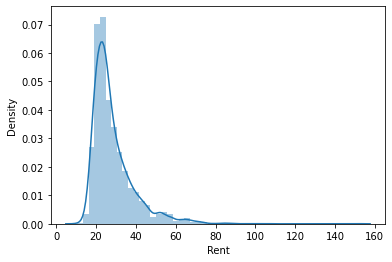

In [8]:
df['Rent']=np.cbrt(df['Rent'])
sns.distplot(df['Rent'])


C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rent', ylabel='Density'>

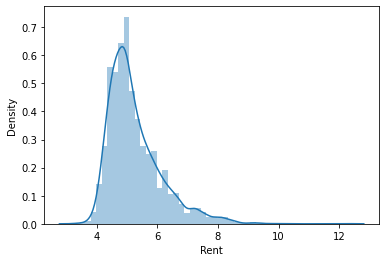

In [9]:
df['Rent']=np.sqrt(df['Rent'])
sns.distplot(df['Rent'])

<AxesSubplot:>

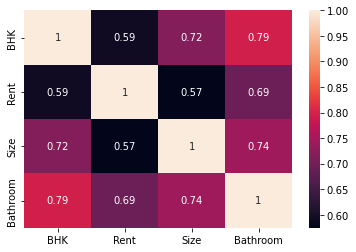

In [10]:
sns.heatmap(df.corr(), annot=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   float64
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 445.1+ KB


In [12]:
X =df[['BHK','Size', 'Bathroom']]

y = df['Rent']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

In [14]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)


LinearRegression()

In [15]:
LR.score(X_test,y_test)

0.4791633170167432

In [16]:
print(LR .intercept_)

3.85677044681275


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
LR.fit(X_train,y_train)

LinearRegression()

In [19]:
print(LR .intercept_)

3.85677044681275


In [20]:
Predictions = LR .predict(X_test)

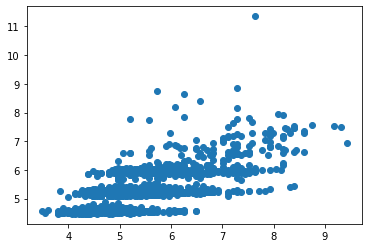

In [21]:
plt.scatter(y_test,Predictions)

C:\Users\CHETANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


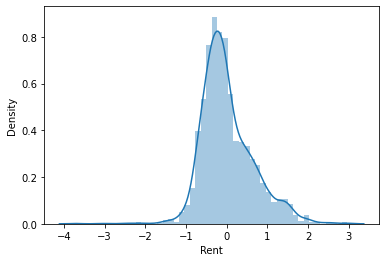

In [22]:
sns.distplot((y_test-Predictions),bins=50);

In [23]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, Predictions))
print('MSE:', metrics.mean_squared_error(y_test, Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predictions)))

MAE: 0.48046043025069424
MSE: 0.4050323961715955
RMSE: 0.6364215553951607


In [24]:
y_pred = LR .predict(X_train)

In [25]:
y_pred = LR .intercept_ + LR .coef_ * X_train

In [26]:
print(f"Predicted_Response:\n{y_pred}")

Predicted_Response:
           BHK      Size  Bathroom
2601  3.896712  3.889156  5.028721
3151  3.896712  4.059178  5.028721
2144  3.876741  3.978215  4.442746
2990  3.916683  4.463994  6.200671
524   3.876741  3.921541  4.442746
...        ...       ...       ...
1180  3.876741  3.937734  4.442746
3441  3.896712  3.998456  5.028721
1344  3.936654  4.362790  6.200671
4623  3.896712  4.099660  4.442746
1289  3.876741  3.955950  4.442746

[2373 rows x 3 columns]


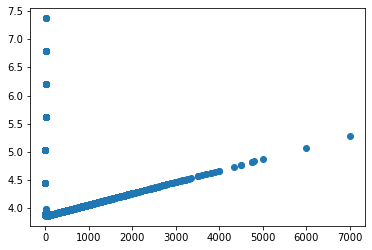

In [27]:
plt.scatter(X_train,y_pred)

In [28]:
LR.score(X_test,y_test)

0.4791633170167432

In [37]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 5,
          learning_rate = 0.1, loss = 'ls')

In [38]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=5, n_estimators=500)

In [36]:
clf.score(X_test,y_test)

0.4434867177190178